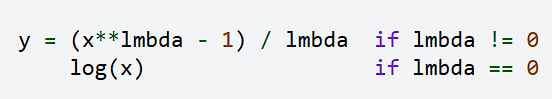

In [2]:
import pandas as pd
import numpy as np
import os
os.chdir(r"C:\Training\Academy\Statistics (Python)\Datasets")
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error
from pmdarima.arima import auto_arima
from statsmodels.tsa.api import ExponentialSmoothing
from scipy.special import boxcox, inv_boxcox

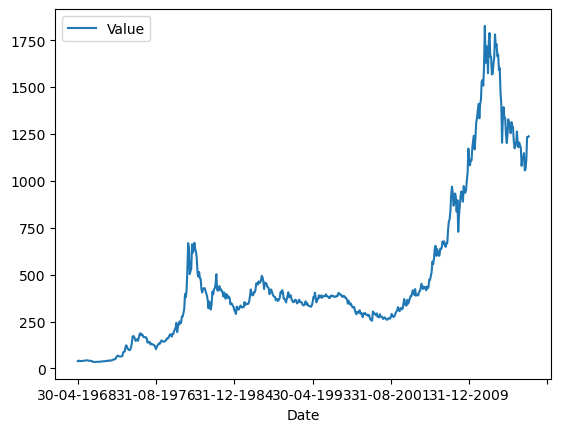

In [3]:
bnk = pd.read_csv("BUNDESBANK-BBK01_WT5511.csv",index_col=0)
bnk.plot()
plt.show()

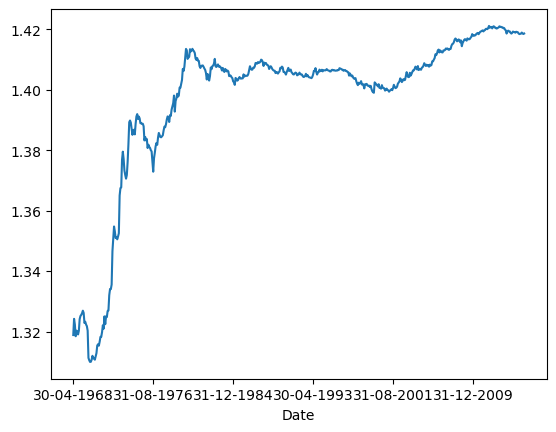

In [4]:
lamb = -0.7
y = bnk['Value']
y_train = y[:-12]
y_test = y[-12:]
y_trans_trn = boxcox(y_train, lamb)
y_trans_trn.plot()
plt.show()

In [ ]:
model = auto_arima(y_trans_trn, trace=True, error_action='ignore', suppress_warnings=True,
                  seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=-5642.092, Time=2.24 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=-5462.654, Time=0.13 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=-5590.912, Time=0.77 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=-5682.011, Time=0.62 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=-5674.590, Time=0.20 sec
 ARIMA(0,2,1)(1,0,1)[12]             : AIC=-5680.006, Time=0.78 sec
 ARIMA(0,2,1)(0,0,2)[12]             : AIC=-5661.022, Time=1.50 sec
 ARIMA(0,2,1)(1,0,0)[12]             : AIC=-5687.927, Time=0.50 sec
 ARIMA(0,2,1)(2,0,0)[12]             : AIC=-5685.831, Time=1.35 sec
 ARIMA(0,2,1)(2,0,1)[12]             : AIC=-5678.042, Time=1.05 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=-5473.215, Time=0.33 sec
 ARIMA(1,2,1)(1,0,0)[12]             : AIC=-5699.692, Time=0.37 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=-5686.684, Time=0.31 sec
 ARIMA(1,2,1)(2,0,0)[12]             : AIC=-5697.629, Time=0.61 sec
 ARIM

In [ ]:
y_pred = model.predict(n_periods=len(y_test))
root_mean_squared_error(y_test, inv_boxcox(y_pred, lamb))

### AusGAS data

In [ ]:
aus = pd.read_csv("AusGas.csv", index_col=0)
aus.plot()
plt.show()

In [ ]:
y = aus['GasProd']
y_train = y[:-12]
y_test = y[-12:]
y_train.shape, y_test.shape

In [ ]:
lamb = 0.2
y_trans_trn = boxcox(y_train, lamb)
y_trans_trn.plot()
plt.show()

In [ ]:
model = auto_arima(y_trans_trn, trace=True, error_action='ignore', suppress_warnings=True,
                  seasonal=True, m=12)

In [ ]:
y_pred = model.predict(n_periods=len(y_test))
root_mean_squared_error(y_test, inv_boxcox(y_pred, lamb))

#### HW with damped

In [ ]:
lamb = 1.7
y_trans_trn = boxcox(y_train, lamb)
y_trans_trn.plot()
plt.show()

In [ ]:
hw_m = ExponentialSmoothing(y_trans_trn, seasonal_periods=12, 
                            trend='add', seasonal='mul', damped_trend=True)
fit3 = hw_m.fit()
fcast3 = fit3.forecast(len(y_test))
fcast3 = inv_boxcox(fcast3, lamb)
hw_m_fcast = pd.Series(fcast3, index=y_test.index)
error = round(root_mean_squared_error(y_test, hw_m_fcast), 2)
y_test.index = hw_m_fcast.index
plt.plot(hw_m_fcast, label='HW Damped Forecast')
plt.plot(y_test, label='Test')
plt.text(8,50000, "RMSE="+str(error))
plt.legend(loc='best')
plt.show()